# Unduh Package

In [2]:
!pip install vaderSentiment deep-translator tqdm




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
from IPython.display import display
import pandas as pd
import os
import glob

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


# Langkah 1:  Memanggil Terjemahan Bahasa Inggris

Terjemahan otomatis menggunakan google Sheets karena jika menggunakan
Library dari python akan lama dan hasilnya sering tidak sesuai

In [6]:
# Memanggil data yg sudah di terjemahkan lewat Gsheets
import pandas as pd
terjemahan_df = pd.read_csv('/content/drive/MyDrive/Folder skripsi/sentimen-saham/Label/hasil_SVM.csv')
display(terjemahan_df.head(10))

,created_at,text,translate,actual_label,SVM_label,sentiment_score
0,2025-02-01 05:39:54+00:00,bbri mau buyback saham dana triliun,BBR wants to buy back trillions of funds in sh...,positif,positif,0.723014
1,2025-02-02 01:11:40+00:00,buat ahli saham sisa uang sekian juta kira sah...,"For stock experts, what shares are profitable ...",netral,negatif,-0.398478
2,2025-02-02 10:22:36+00:00,bbri umum rencana buyback saham nila rp triliu...,bbri general plan share buyback worth rp trill...,positif,positif,0.707077
3,2025-02-02 17:39:54+00:00,bbkp cut bang lai tinggal avg down kalo modal ...,"BBKP cut, bro, just average down if you have B...",positif,negatif,-0.394759
4,2025-02-03 01:11:07+00:00,bri bbri siap rp t buyback,BRI BBR ready for Rp t buyback,positif,positif,0.956329
5,2025-02-03 01:21:29+00:00,bagaimana view bijak trump,what is Trump's wise view?,netral,negatif,-0.277741
6,2025-02-03 02:48:02+00:00,siap siap pahlawan pahlawan saham bakal hype k...,"Get ready, stock heroes will be hyped, the wor...",positif,negatif,-0.456380
7,2025-02-03 02:51:43+00:00,investor siapsiap bbri mau buyback saham rp tr...,"Investors are getting ready, BRI wants to buy ...",positif,positif,0.913353
8,2025-02-03 03:54:08+00:00,imbas hampir umum kena semua sih korelasi pros...,"The impact is almost universal, all of which a...",negatif,negatif,-0.482778
9,2025-02-03 04:15:12+00:00,aku nawar agro rejek mulu nawar bbri malah apl...,"I always bid on Agro Rejeki, but I bid on Bbri...",negatif,negatif,-0.559444


In [7]:
vader_df = terjemahan_df[['translate','text', 'actual_label']].copy()

In [8]:
# Agar kalimat dalam tabel dapat terbaca semua
import pandas as pd
pd.set_option('display.max_colwidth', None)
display(vader_df.head())

,translate,text,actual_label
0,BBR wants to buy back trillions of funds in shares,bbri mau buyback saham dana triliun,positif
1,"For stock experts, what shares are profitable between BBR, BBCA, BMRI, and other stocks? I want to average down the shares I bought last year. They were expensive, please advise.",buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please,netral
2,bbri general plan share buyback worth rp trillion plan to discuss rupst march approximately buyback period march march open information,bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi,positif
3,"BBKP cut, bro, just average down if you have BBCA capital, BRI installments every month, UNV, so that wkwk",bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk,positif
4,BRI BBR ready for Rp t buyback,bri bbri siap rp t buyback,positif


# Langkah 2: Jalankan VADER untuk kolom yang telah diterjemahkan


In [9]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Fungsi untuk menganalisis sentimen menggunakan VADER
def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    # Menentukan label sentimen berdasarkan skor compound
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'
# Terapkan fungsi VADER ke kolom 'translate'
vader_df['vader_sentiment'] = vader_df['translate'].apply(analyze_sentiment_vader)
# Tampilkan hasil
print("\nHasil Analisis Sentimen VADER:")
display(vader_df.head())
# Opsional: Hitung jumlah setiap sentimen
print("\nDistribusi Sentimen VADER:")
print(vader_df['vader_sentiment'].value_counts())
# Opsional: Bandingkan dengan actual_label
print("\nPerbandingan dengan Actual Label:")
comparison = pd.crosstab(vader_df['actual_label'], vader_df['vader_sentiment'])
comparison


Hasil Analisis Sentimen VADER:


,translate,text,actual_label,vader_sentiment
0,BBR wants to buy back trillions of funds in shares,bbri mau buyback saham dana triliun,positif,positive
1,"For stock experts, what shares are profitable between BBR, BBCA, BMRI, and other stocks? I want to average down the shares I bought last year. They were expensive, please advise.",buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please,netral,positive
2,bbri general plan share buyback worth rp trillion plan to discuss rupst march approximately buyback period march march open information,bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi,positif,positive
3,"BBKP cut, bro, just average down if you have BBCA capital, BRI installments every month, UNV, so that wkwk",bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk,positif,negative
4,BRI BBR ready for Rp t buyback,bri bbri siap rp t buyback,positif,positive



Distribusi Sentimen VADER:
vader_sentiment
positive    118
neutral      68
negative     52
Name: count, dtype: int64

Perbandingan dengan Actual Label:


vader_sentiment,negative,neutral,positive
actual_label,,,
negatif,35,20,47
netral,8,29,20
positif,9,19,51


In [10]:
# Untuk Memberikan skor sesuai dengan Kamus VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    if isinstance(text, str):
        scores = analyzer.polarity_scores(text)
        return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])
    else:
        return pd.Series([0.0, 0.0, 0.0, 0.0])
vader_df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = \
    vader_df['translate'].apply(get_vader_sentiment)


# Langkah 3: Label sentimen dari VADER berdasarkan compound score

In [11]:
# Memberikan Skor Sesuai dengan Hasil Skor Compound

def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positif'
    elif compound_score <= -0.05:
        return 'negatif'
    else:
        return 'netral'
vader_df['vader_sentiment'] = vader_df['vader_compound'].apply(classify_sentiment)

# Skor Compound

In [12]:
print(vader_df[['text', 'vader_compound', 'vader_sentiment']].head())

                                                                                                                                                               text  \
0                                                                                                                               bbri mau buyback saham dana triliun   
1  buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please   
2                                         bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi   
3                                                                            bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk   
4                                                                                                                                        bri bbri siap rp t buyback  

In [13]:
vader_df['translate'] = vader_df['translate'].str.lower()
display(vader_df.head(40))

,translate,text,actual_label,vader_sentiment,vader_neg,vader_neu,vader_pos,vader_compound
0,bbr wants to buy back trillions of funds in shares,bbri mau buyback saham dana triliun,positif,positif,0.000,0.804,0.196,0.2960
1,"for stock experts, what shares are profitable between bbr, bbca, bmri, and other stocks? i want to average down the shares i bought last year. they were expensive, please advise.",buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please,netral,positif,0.000,0.696,0.304,0.8360
2,bbri general plan share buyback worth rp trillion plan to discuss rupst march approximately buyback period march march open information,bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi,positif,positif,0.000,0.814,0.186,0.4767
3,"bbkp cut, bro, just average down if you have bbca capital, bri installments every month, unv, so that wkwk",bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk,positif,negatif,0.104,0.896,0.000,-0.2732
4,bri bbr ready for rp t buyback,bri bbri siap rp t buyback,positif,positif,0.000,0.706,0.294,0.3612
5,what is trump's wise view?,bagaimana view bijak trump,netral,positif,0.000,0.563,0.437,0.4767
6,"get ready, stock heroes will be hyped, the word buy using time trading is aci lah, at least for the base",siap siap pahlawan pahlawan saham bakal hype kata beli pakai time trading aci lah paling enggak buat alas,positif,positif,0.000,0.766,0.234,0.7003
7,"investors are getting ready, bri wants to buy back rp trillion in shares",investor siapsiap bbri mau buyback saham rp triliun,positif,positif,0.000,0.701,0.299,0.5719
8,"the impact is almost universal, all of which are affected by the correlation of stock market prospects. you can read it here, bbca, bbr ratu.",imbas hampir umum kena semua sih korelasi prospek pasar saham kamu baca sini bbca bbri ratu,negatif,positif,0.060,0.858,0.082,0.1531
9,"i always bid on agro rejeki, but i bid on bbri, but the application immediately lost its signal.",aku nawar agro rejek mulu nawar bbri malah aplikasi langsung hilang signal,negatif,negatif,0.148,0.852,0.000,-0.4497


In [14]:
vader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   translate        238 non-null    object 
 1   text             238 non-null    object 
 2   actual_label     238 non-null    object 
 3   vader_sentiment  238 non-null    object 
 4   vader_neg        238 non-null    float64
 5   vader_neu        238 non-null    float64
 6   vader_pos        238 non-null    float64
 7   vader_compound   238 non-null    float64
dtypes: float64(4), object(4)
memory usage: 15.0+ KB


# Evaluasi

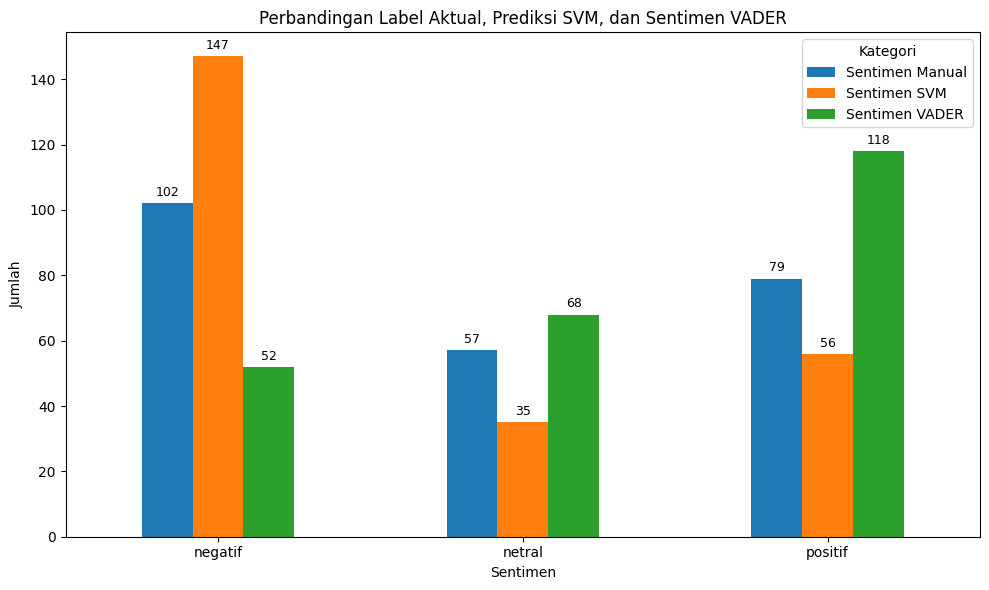

Jumlah dan Persentase per Label:
        Sentimen Manual Sentimen SVM Sentimen VADER
negatif     102 (42.9%)  147 (61.8%)     52 (21.8%)
netral       57 (24.0%)   35 (14.7%)     68 (28.6%)
positif      79 (33.2%)   56 (23.5%)    118 (49.6%)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah label
actual_counts = vader_df['actual_label'].value_counts().sort_index()
svm_counts = terjemahan_df['SVM_label'].value_counts().sort_index()
vader_counts = vader_df['vader_sentiment'].value_counts().sort_index()

# Gabungkan ke dalam satu DataFrame
comparison_df = pd.DataFrame({
    'Sentimen Manual': actual_counts,
    'Sentimen SVM': svm_counts,
    'Sentimen VADER': vader_counts
}).fillna(0)

# Hitung total untuk masing-masing kategori
totals = comparison_df.sum()

# Hitung persentase untuk masing-masing nilai
percent_df = comparison_df.divide(totals, axis=1) * 100
percent_df = percent_df.round(2)  # agar rapi

# Tambahkan akhiran % ke dalam dataframe persentase (jika ingin ditampilkan sebagai teks)
percent_display = percent_df.astype(str) + '%'

# Gabungkan jumlah dan persentase menjadi satu string jika ingin ditampilkan pada plot
combined_df = comparison_df.astype(int).astype(str) + ' (' + percent_df.round(1).astype(str) + '%)'

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = comparison_df.plot(kind='bar', ax=ax, rot=0)

# Tambahkan label pada setiap batang
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # offset
                        textcoords='offset points',
                        ha='center', va='bottom', fontsize=9)

# Set label dan judul
ax.set_xlabel('Sentimen')
ax.set_ylabel('Jumlah')
ax.set_title('Perbandingan Label Aktual, Prediksi SVM, dan Sentimen VADER')
plt.legend(title='Kategori')
plt.tight_layout()
plt.show()

# Jika ingin juga menampilkan tabel kombinasi jumlah dan persentase:
print("Jumlah dan Persentase per Label:")
print(combined_df)



In [16]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
display(vader_df)

,translate,text,actual_label,vader_sentiment,vader_neg,vader_neu,vader_pos,vader_compound
0,bbr wants to buy back trillions of funds in shares,bbri mau buyback saham dana triliun,positif,positif,0.000,0.804,0.196,0.2960
1,"for stock experts, what shares are profitable between bbr, bbca, bmri, and other stocks? i want to average down the shares i bought last year. they were expensive, please advise.",buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please,netral,positif,0.000,0.696,0.304,0.8360
2,bbri general plan share buyback worth rp trillion plan to discuss rupst march approximately buyback period march march open information,bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi,positif,positif,0.000,0.814,0.186,0.4767
3,"bbkp cut, bro, just average down if you have bbca capital, bri installments every month, unv, so that wkwk",bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk,positif,negatif,0.104,0.896,0.000,-0.2732
4,bri bbr ready for rp t buyback,bri bbri siap rp t buyback,positif,positif,0.000,0.706,0.294,0.3612
...,...,...,...,...,...,...,...,...
233,kwoakwoa stuck bbri fix year can't do anything,kwoakwoa nyangkut bbri fix tahun enggak bisa apa apa,negatif,negatif,0.222,0.778,0.000,-0.2500
234,"it's okay to hold on, bro, the ihsg is indeed trending down, bbr is getting worse",gapapa hold bang ihsg memang trend turun bbri serok,positif,negatif,0.163,0.737,0.100,-0.2960
235,bbri fell and plunged today,bbri jatuh malah nyungsep hari,negatif,netral,0.000,1.000,0.000,0.0000
236,"look at the previous bbca bbr shares and ordinary shares, the market value was high, but they actually fell a lot.",lihat tadi kalau saham bbca bbri sama saham biasa nilai pasar tinggi malah meeosot jauh,negatif,positif,0.000,0.786,0.214,0.4404


Accuracy: 0.4832
Precision (weighted): 0.5341
Recall (weighted): 0.4832
F1-Score (weighted): 0.4778

Confusion Matrix:
[[35 20 47]
 [ 8 29 20]
 [ 9 19 51]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.67      0.34      0.45       102
      netral       0.43      0.51      0.46        57
     positif       0.43      0.65      0.52        79

    accuracy                           0.48       238
   macro avg       0.51      0.50      0.48       238
weighted avg       0.53      0.48      0.48       238



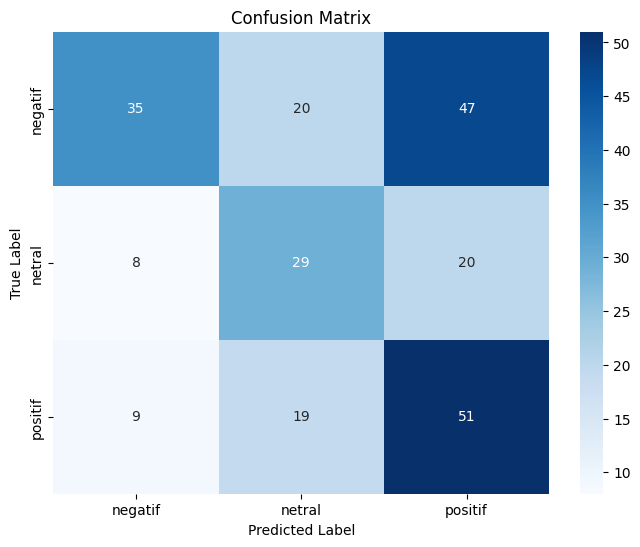

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Evaluasi performa model VADER
y_true = vader_df['actual_label']
y_pred = vader_df['vader_sentiment']

# Hitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted') # Gunakan weighted karena data mungkin tidak seimbang
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

# Cetak hasil evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# Opsional: Visualisasi Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_true.unique()), yticklabels=sorted(y_true.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Hasil Label dan Skornya

In [18]:
X_test = vader_df['text']
y_test = vader_df['actual_label']
y_pred = vader_df['vader_sentiment']
skor_sentimen_vader = vader_df['vader_compound']



hasil_df = pd.DataFrame({
    'text': X_test,
    'actual_label': y_test,
    'label_vader': y_pred,
    'sentiment_score_vader': skor_sentimen_vader
})

display(hasil_df.head())
hasil_df.info()

,text,actual_label,label_vader,sentiment_score_vader
0,bbri mau buyback saham dana triliun,positif,positif,0.2960
1,buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please,netral,positif,0.8360
2,bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi,positif,positif,0.4767
3,bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk,positif,negatif,-0.2732
4,bri bbri siap rp t buyback,positif,positif,0.3612


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   text                   238 non-null    object 
 1   actual_label           238 non-null    object 
 2   label_vader            238 non-null    object 
 3   sentiment_score_vader  238 non-null    float64
dtypes: float64(1), object(3)
memory usage: 7.6+ KB


In [19]:
# Memanggil created_at, svm_label dan sentiment_score di terjemahan_df, lalu menggabungkan dengan hasil_df

import pandas as pd
# Pilih kolom yang relevan dari terjemahan_df
terjemahan_subset = terjemahan_df[['created_at', 'SVM_label','sentiment_score']]

# Gabungkan dengan hasil_df
hasil_df = pd.merge(hasil_df, terjemahan_subset, left_index=True, right_index=True, how='left')

# Mengganti nama kolom SVM_label menjadi svm_label untuk konsistensi
hasil_df.rename(columns={'SVM_label': 'svm_label'}, inplace=True)


# Tampilkan hasil penggabungan
print("\nHasil DataFrame setelah digabung:")
display(hasil_df.head())
hasil_df.info()


Hasil DataFrame setelah digabung:


,text,actual_label,label_vader,sentiment_score_vader,created_at,svm_label,sentiment_score
0,bbri mau buyback saham dana triliun,positif,positif,0.2960,2025-02-01 05:39:54+00:00,positif,0.723014
1,buat ahli saham sisa uang sekian juta kira saham apa profitable antara saham ikut bbri bbca bmri tuju mau average down saham beli tahun lalu mahal advise please,netral,positif,0.8360,2025-02-02 01:11:40+00:00,negatif,-0.398478
2,bbri umum rencana buyback saham nila rp triliun rencana bahas rupst maret kira periode buyback maret maret buka informasi,positif,positif,0.4767,2025-02-02 10:22:36+00:00,positif,0.707077
3,bbkp cut bang lai tinggal avg down kalo modal bbca bbri cicil tiap bulan unv biar wkwk,positif,negatif,-0.2732,2025-02-02 17:39:54+00:00,negatif,-0.394759
4,bri bbri siap rp t buyback,positif,positif,0.3612,2025-02-03 01:11:07+00:00,positif,0.956329


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   text                   238 non-null    object 
 1   actual_label           238 non-null    object 
 2   label_vader            238 non-null    object 
 3   sentiment_score_vader  238 non-null    float64
 4   created_at             238 non-null    object 
 5   svm_label              238 non-null    object 
 6   sentiment_score        238 non-null    float64
dtypes: float64(2), object(5)
memory usage: 13.1+ KB


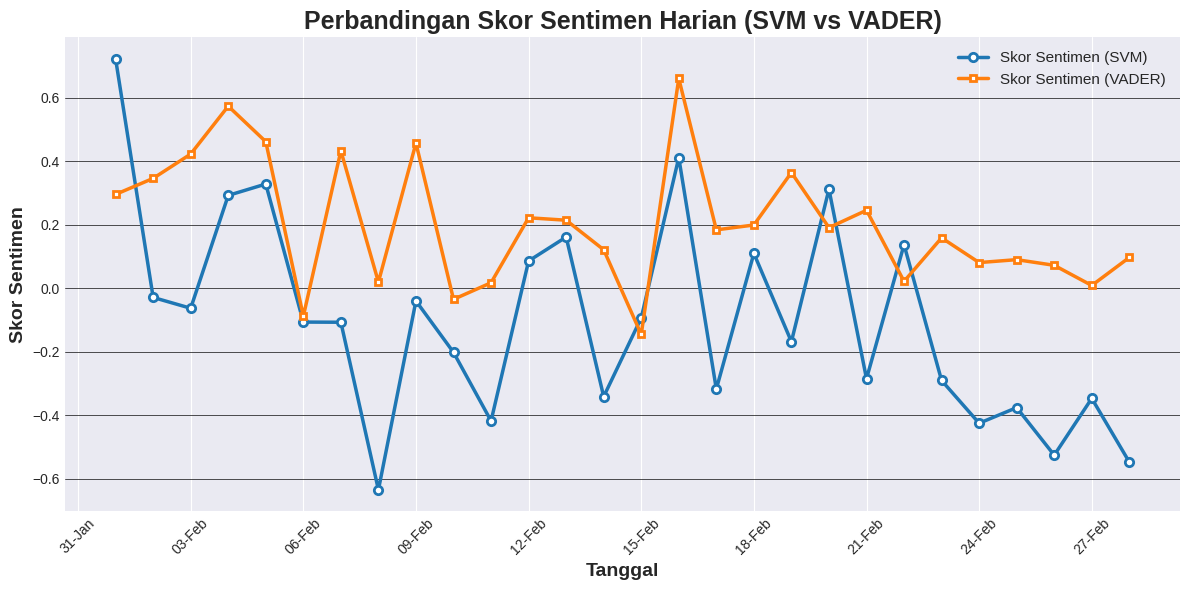

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

# Gaya visual seperti grafik saham
plt.style.use('seaborn-v0_8-darkgrid')

# Pastikan kolom tanggal benar
hasil_df['created_at'] = pd.to_datetime(hasil_df['created_at'])

# Hitung rata-rata skor per hari untuk kedua model
daily_avg = hasil_df.groupby(hasil_df['created_at'].dt.date)[['sentiment_score', 'sentiment_score_vader']].mean().reset_index()
daily_avg.columns = ['tanggal', 'rata2_svm', 'rata2_vader']

# Buat plot
plt.figure(figsize=(12, 6))

# Garis SVM
plt.plot(
    daily_avg['tanggal'],
    daily_avg['rata2_svm'],
    color='#1f77b4',  # hijau SVM
    linewidth=2.5,
    marker='o',
    markersize=6,
    markerfacecolor='white',
    markeredgewidth=2,
    label='Skor Sentimen (SVM)'
)

# Garis VADER
plt.plot(
    daily_avg['tanggal'],
    daily_avg['rata2_vader'],
    color='#ff7f0e',  # biru VADER
    linewidth=2.5,
    marker='s',
    markersize=5,
    markerfacecolor='white',
    markeredgewidth=2,
    label='Skor Sentimen (VADER)'
)

# Format tanggal
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

# Label dan estetika
plt.title('Perbandingan Skor Sentimen Harian (SVM vs VADER)', fontsize=18, fontweight='bold')
plt.xlabel('Tanggal', fontsize=14,fontweight='bold')
plt.ylabel('Skor Sentimen', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.grid(
    True,
    which='major',
    axis='y',  # hanya horizontal
    linestyle='-',
    linewidth=0.6,
    alpha=0.8,
    color='black'  # atau coba: 'lightgray', '#888888', '#cccccc'
)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('grafik_sentimen.png', dpi=300, bbox_inches='tight')
plt.show()